In [1]:
import nltk
from nltk.tokenize import word_tokenize
from transformers import pipeline

nltk.download('punkt')

sentiment_pipeline = pipeline(task="sentiment-analysis", model="kykim/bert-kor-base")

C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
pytorch_model.bin: 100%|████████████████████████████████████████████████████████████| 476M/476M [00:44<00:00, 10.7MB/s]
C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Owner\.cache\huggingface\hub\models--kykim--bert-kor-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be di

In [5]:
from nltk.tokenize import RegexpTokenizer

syllable_pattern = "[가-힣]"
tokenizer = RegexpTokenizer(syllable_pattern)

In [11]:
tokenizer.tokenize("김민지")
[char for char in "김민지"]

['김', '민', '지']

In [76]:
글자 = {
    "leads": ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ'],
    "vowels": ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ'],
    "tails": ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
}

def decompose(word):
    
    def decompose_hangul(syllable):
        # Initialize lists for lead, vowel, and tail characters
        lead_chars, vowel_chars, tail_chars = [], [], []

        # Decompose the Hangul syllable into Jamo characters
        for char in syllable:
            if '가' <= char <= '힣':
                # Calculate the index of the Jamo in the Unicode table
                index = ord(char) - ord('가')

                # Calculate the indices for lead, vowel, and tail
                lead_index = index // (21 * 28)
                vowel_index = (index // 28) % 21
                tail_index = index % 28

                # Append the corresponding Jamo characters to their lists
                lead_chars.append(글자["leads"][lead_index])
                vowel_chars.append(글자["vowels"][vowel_index])
                tail_chars.append(글자["tails"][tail_index])

        return lead_chars, vowel_chars, tail_chars

    # Decompose each syllable into Jamo characters
    lead_chars, vowel_chars, tail_chars = zip(*[decompose_hangul(syllable) for syllable in word])

    # Flatten the lists and print the result
    result = [
        char for sublist in zip(lead_chars, vowel_chars, tail_chars) for char_list in sublist for char in char_list
    ]
    
    return result

In [39]:
locs = ["leads", "vowels", "tails"]
def map_strokes(character, index):
    loc = locs[index % 3]
    strokes = {
        "leads": [2, 4, 2, 3, 6, 5, 4, 4, 8, 2, 4, 1, 3, 6, 4, 3, 4, 4, 3],
        "vowels": [2, 3, 3, 4, 2, 2, 3, 3, 3, 4, 2, 4, 5, 3, 3, 2, 4, 5, 3, 3, 1, 2, 1],
        "tails": [0, 2, 4, 4, 2, 5, 5, 3, 5, 7, 9, 9, 7, 9, 9, 8, 4, 4, 6, 2, 4, 1, 3, 4, 3, 4, 4, 3]
    }
    for i in range(0, len(글자[loc])):
        if(character == 글자[loc][i]):
            return strokes[loc][i]

[2, 1, 4, 4, 1, 2, 3, 1, 0]

In [78]:
def arrange_names(n1, n2):
    n1_split = [char for char in n1]
    n2_split = [char for char in n2]
    diff = abs(len(n1_split)-len(n2_split))
    combined = n1_split + n2_split
    interweved = [n1_split[0]]
    for i in range(1, len(combined)+diff):
        try:
            if i % 2 == 1:
                interweved.append(n2_split[int((i-1)/2)])
            else:
                interweved.append(n1_split[int(i/2)])
        except Exception as e:
            interweved.append("")   
    return "".join(interweved)

[1, 1, 0, 2, 1, 4, 2, 3, 4, 4, 1, 2, 5, 1, 0, 3, 1, 0]

In [81]:
decomposition = [map_strokes(char, i) for i, char in enumerate(decompose(arrange_names("이샘리", "김민지")))]
이름점 = [sum(decomposition[i:i+3]) for i in range(0, len(decomposition)-2, 3)]
이름점

[2, 7, 9, 7, 6, 4]

In [96]:
def 평가하기(이름점):
    이름궁합 = [j % 10 for j in [sum(이름점[i:i+2]) for i in range(0, len(이름점)-1)]]
    while len(이름궁합) >= 3:
        if(int("".join([str(숫자) for 숫자 in 이름궁합])) == 100):
            break
        
        이름궁합 = [j % 10 for j in [sum(이름궁합[i:i+2]) for i in range(0, len(이름궁합)-1)]]
    return int("".join([str(숫자) for 숫자 in 이름궁합]))

평가하기(이름점)

83

In [120]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import math

url = "https://en.wikipedia.org/wiki/List_of_the_most_popular_given_names_in_South_Korea#cite_note-KukminIlbo20193-2"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
tables = soup.find_all("table", class_="wikitable")

years = [2021, 2019, 2017, 2015, 2013, 2011, 2009, 2007, 2004, 1990, 1980, 1970, 1960, 1950, 1945, 1940]

popular_names = pd.DataFrame()
for i in range(0, len(tables), 2):
    boys = pd.read_html(str(tables[i]), header=0)[0][["Hangul"]]
    boys["성"] = "남"
    girls = pd.read_html(str(tables[i+1]), header=0)[0][["Hangul"]]
    girls["성"] = "여"
    
    combined = pd.concat([boys, girls])
    combined["년"] = years[math.floor(i/2)]
    
    if years[math.floor(i/2)] == 2015:
        combined.drop(combined.index[-1], inplace=True)
    
    if popular_names.empty:
        popular_names = combined.copy()
    else:
        popular_names = pd.concat([popular_names, combined])
        
popular_names.rename(columns={"Hangul": "이름"}, inplace=True)
popular_names.reset_index(drop=True, inplace=True)

In [122]:
popular_names

,이름,성,년
0,이준,남,2021
1,서준,남,2021
2,하준,남,2021
3,도윤,남,2021
4,은우,남,2021
...,...,...,...
5,정자,여,1940
6,순자,여,1940
7,순희,여,1940
8,정순,여,1940


In [145]:
url = "https://en.wikipedia.org/wiki/List_of_Korean_surnames"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
tables = soup.find_all("table", class_="wikitable")

surnames1 = pd.read_html(str(tables[0]), header=0)[0][["Hangul[1]"]]
surnames1.drop(surnames1.index[-1], inplace=True)
surnames1.rename(columns={"Hangul[1]": "성"}, inplace=True)
surnames2 = pd.read_html(str(tables[1]), header=0)[0][["Hangul[7]"]]
surnames2.rename(columns={"Hangul[7]": "성"}, inplace=True)

surnames = pd.concat([surnames1, surnames2])

In [137]:
subset = popular_names[popular_names["년"] == 2004]
subset

,이름,성,년
0,민준,남,2004
1,지훈,남,2004
2,현우,남,2004
3,준서,남,2004
4,우진,남,2004
5,건우,남,2004
6,예준,남,2004
7,현준,남,2004
8,도현,남,2004
9,동현,남,2004


In [164]:
boys = subset[subset["성"] == "남"]
girls = subset[subset["성"] == "여"]

distributions = []

#이름궁합 distribution for 가민준
for i, boy in boys.head(1).iterrows(): #boys.iterrows():
    distribution = []
    for j, girl in girls.iterrows():
        for k, surname_k in surnames.head(1).iterrows(): #surnames.iterrows():
            for l, surname_l in surnames.iterrows():
                name1 = f'{surname_k["성"]}{boy["이름"]}'
                name2 = f'{surname_l["성"]}{girl["이름"]}'
                decomposition = [map_strokes(char, i) for i, char in enumerate(decompose(arrange_names("이샘", name2)))]
                이름점 = [sum(decomposition[i:i+3]) for i in range(0, len(decomposition)-2, 3)]
                평가 = 평가하기(이름점)
                distribution.append(평가)
    distributions.append(distribution)

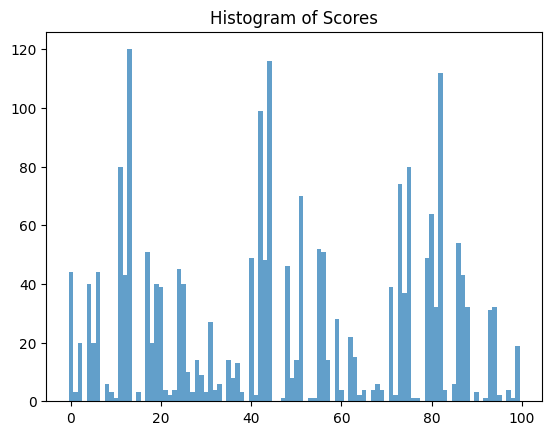

In [166]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distribution(data):
    plt.hist(data, bins=np.arange(min(data), max(data) + 1.5) - 0.5, alpha=0.7)
    plt.title('Histogram of Scores')
    plt.show()
    
plot_distribution(distributions[0])

In [181]:
max_indices = np.where(distributions[0] == np.max(distributions[0]))

In [201]:
decompositions = [
    [
        map_strokes(char, i) 
        for i, char in enumerate(decompose(arrange_names("이샘", f'{surnames.iloc[x % 217]["성"]}{girls.iloc[x // 217]["이름"]}')))
    ] 
    for x in max_indices[0]
]

[
    평가하기([sum(decomposition[i:i+3]) for i in range(0, len(decomposition)-2, 3)]) for decomposition in decompositions
]

[99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]

In [204]:
[
 f'{surnames.iloc[x % 217]["성"]}{girls.iloc[x // 217]["이름"]}'
    for x in np.where(distributions[0] == np.max(distributions[0]))[0]
]

[
 f'{surnames.iloc[x % 217]["성"]}{girls.iloc[x // 217]["이름"]}'
    for x in np.where(distributions[0] == np.min(distributions[0]))[0]
]

['감민서',
 '곽민서',
 '관민서',
 '길민서',
 '남민서',
 '독민서',
 '돈민서',
 '랑민서',
 '려민서',
 '로민서',
 '만민서',
 '맹민서',
 '명민서',
 '박민서',
 '반민서',
 '번민서',
 '봉민서',
 '삼민서',
 '섭민서',
 '염민서',
 '엽민서',
 '육민서',
 '윤민서',
 '음민서',
 '천민서',
 '총민서',
 '최민서',
 '탁민서',
 '탄민서',
 '판민서',
 '팽민서',
 '평민서',
 '풍민서',
 '현민서',
 '황민서',
 '돈민서',
 '준민서',
 '사공서현',
 '선우서현',
 '황보서현',
 '사공서윤',
 '선우서윤',
 '황보서윤',
 '이하은']